26857


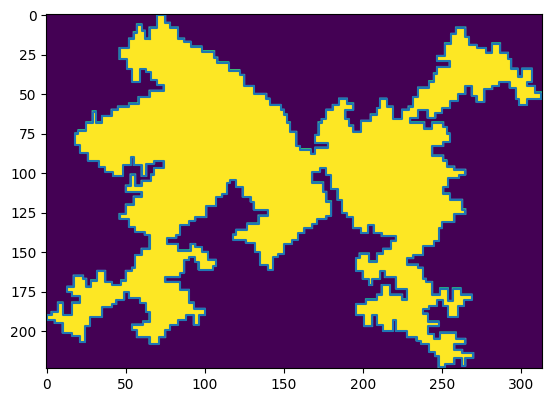

In [45]:
import matplotlib.pyplot as plt
import re
import numpy as np
from functools import reduce

with open('input.txt') as f:
    lines = f.readlines()

def get_parts(s: str) -> tuple[str, int, str]:
    m = re.match(r'^(R|L|U|D) ([0-9]+) \((#[a-z0-9]{6})\)$', s)
    return (m.group(1), int(m.group(2)), m.group(3))    

def flood(board: np.ndarray, start: tuple[int, int]) -> np.ndarray:
    current_indeces = [start]
    while len(current_indeces) > 0:
        next_indeces = []
        for row, column in current_indeces:
            if board[row, column] != 0:
                continue
            board[row, column] = 1
            for row_offset, column_offset in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                if row + row_offset < 0 or row + row_offset >= board.shape[0] or column + column_offset < 0 or column + column_offset >= board.shape[1]:
                    continue
                next_indeces.append((row + row_offset, column + column_offset))
        current_indeces = next_indeces
            

instrucions = [get_parts(s.strip()) for s in lines]

vertices = [(0, 0)]
for instr in instrucions:
    vertex = None
    match instr[0]:
        case 'R':
            vertex = (vertices[-1][0] + instr[1], vertices[-1][1])
        case 'L':
            vertex = (vertices[-1][0] - instr[1], vertices[-1][1])
        case 'U':
            vertex = (vertices[-1][0], vertices[-1][1] + instr[1])
        case 'D':
            vertex = (vertices[-1][0], vertices[-1][1] - instr[1])
    
    vertices.append(vertex)
    
vertices = np.array(vertices)
minmax = {
    'x' : (reduce(lambda a, b: a if a < b else b, vertices[:, 0]), reduce(lambda a, b: a if a > b else b, vertices[:, 0]) + 1),
    'y' : (reduce(lambda a, b: a if a < b else b, vertices[:, 1]), reduce(lambda a, b: a if a > b else b, vertices[:, 1]) + 1)
}
shape = (minmax['y'][1] - minmax['y'][0], minmax['x'][1] - minmax['x'][0])

drawing_board = np.zeros(shape)

adjusted_vertices = np.array(list(map(lambda vertex: (vertex[0] - minmax['x'][0], vertex[1] - minmax['y'][0]), vertices)))
for [x1, y1], [x2, y2] in zip(adjusted_vertices, adjusted_vertices[1:]):
    if x1 < x2:
        drawing_board[y1, np.arange(x1, x2 + 1)] = 1
    elif x1 > x2:
        drawing_board[y1, np.arange(x2, x1 + 1)] = 1
    elif y1 < y2:
        drawing_board[np.arange(y1, y2), x1] = 1
    elif y1 > y2:
        drawing_board[np.arange(y2, y1 + 1), x1] = 1

#add edges for flood algorihtm
rotated_board = np.flip(np.rot90(drawing_board, 2), axis=1)
flood(rotated_board, (150, 100))
# plt.figure(figsize=(50, 50))
print(len(np.where(rotated_board == 1)[0].ravel()))
plt.imshow(drawing_board)
plt.plot(adjusted_vertices[:, 0], adjusted_vertices[:, 1])
# plt.gca().set_xticks([i + 0.5 for i in range(shape[1])])
# plt.gca().set_yticks([i + 0.5 for i in range(shape[0])])
# plt.grid(color='black')
plt.show()

25342.0


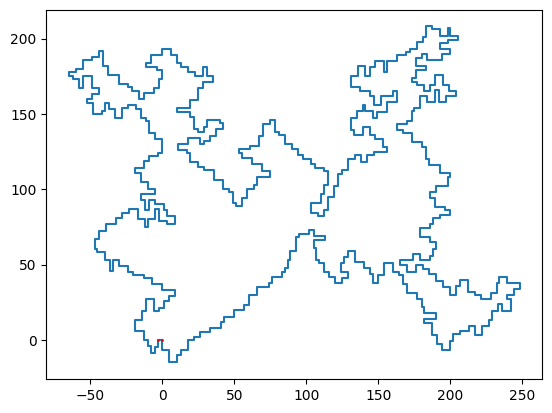

In [9]:
# Test Gaußsche Trapezformel

gsum = 0
for [x1, y1], [x2, y2] in zip(vertices[::-1], vertices[::-1][1:]):
    gsum += x1*y2 - x2*y1

print(gsum / 2)
plt.plot(vertices[:, 0], vertices[:, 1])
plt.plot(vertices[0:2, 0], vertices[0:2, 1], 'ro', markersize=1)
plt.show()